In [1]:
import numpy as np 
import pandas as pd
import os
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [2]:
pwd

'C:\\Users\\User'

In [3]:
df = pd.read_csv('C:/Users/User/Desktop/fifa 2019 profect/data.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
Unnamed: 0                  18207 non-null int64
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null fl

In [5]:
df.head(10)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
5,5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,€172.1M
6,6,177003,L. Modrić,32,https://cdn.sofifa.org/players/4/19/177003.png,Croatia,https://cdn.sofifa.org/flags/10.png,91,91,Real Madrid,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,€137.4M
7,7,176580,L. Suárez,31,https://cdn.sofifa.org/players/4/19/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,91,91,FC Barcelona,...,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,€164M
8,8,155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,91,Real Madrid,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,€104.6M
9,9,200389,J. Oblak,25,https://cdn.sofifa.org/players/4/19/200389.png,Slovenia,https://cdn.sofifa.org/flags/44.png,90,93,Atlético Madrid,...,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,€144.5M


In [6]:
df.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


In [7]:
df.drop(columns=['Unnamed: 0','Photo','Flag','Club Logo', 'Loaned From', 'Special', 'Body Type', 'International Reputation', 'Weak Foot', 'Skill Moves',
                 'Joined', 'Contract Valid Until', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 
                'LB', 'LCB', 'CB', 'RCB', 'RB', 'RDM', 'RWB', 'Real Face', 'GKReflexes', 'GKPositioning', 'GKKicking', 'GKHandling', 'GKDiving', 'SlidingTackle', 'Marking', 
                'Composure', 'StandingTackle', 'Penalties', 'Vision', 'Positioning', 'Interceptions', 'Aggression', 'LongShots', 'Strength', 'Stamina', 'Jumping', 'ShotPower', 
                'Balance', 'Reactions', 'Agility', 'SprintSpeed', 'Acceleration', 'LongPassing', 'FKAccuracy', 'Curve', 'Volleys', 'ShortPassing', 'HeadingAccuracy', 'Crossing'])

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,Work Rate,Position,Jersey Number,Height,Weight,Finishing,Dribbling,BallControl,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,Medium/ Medium,RF,10.0,5'7,159lbs,95.0,97.0,96.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,High/ Low,ST,7.0,6'2,183lbs,94.0,88.0,94.0,€127.1M
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,High/ Medium,LW,10.0,5'9,150lbs,87.0,96.0,95.0,€228.1M
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Right,Medium/ Medium,GK,1.0,6'4,168lbs,13.0,18.0,42.0,€138.6M
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Right,High/ High,RCM,7.0,5'11,154lbs,82.0,86.0,91.0,€196.4M
5,183277,E. Hazard,27,Belgium,91,91,Chelsea,€93M,€340K,Right,High/ Medium,LF,10.0,5'8,163lbs,84.0,95.0,94.0,€172.1M
6,177003,L. Modrić,32,Croatia,91,91,Real Madrid,€67M,€420K,Right,High/ High,RCM,10.0,5'8,146lbs,72.0,90.0,93.0,€137.4M
7,176580,L. Suárez,31,Uruguay,91,91,FC Barcelona,€80M,€455K,Right,High/ Medium,RS,9.0,6'0,190lbs,93.0,87.0,90.0,€164M
8,155862,Sergio Ramos,32,Spain,91,91,Real Madrid,€51M,€380K,Right,High/ Medium,RCB,15.0,6'0,181lbs,60.0,63.0,84.0,€104.6M
9,200389,J. Oblak,25,Slovenia,90,93,Atlético Madrid,€68M,€94K,Right,Medium/ Medium,GK,1.0,6'2,192lbs,11.0,12.0,16.0,€144.5M


In [8]:
def value_norm(x):
    x = str(x).replace('€', '')
    
    if('M' in str(x)):
        x = str(x).replace('M', '')
        x = float(x) * 1000000
        
    elif('K' in str(x)):
        x = str(x).replace('K', '')
        x = float(x) * 1000
        
    return float(x)

df['Value'] = df['Value'].apply(value_norm)

In [9]:
df.groupby(['Name'])['Value'].sum().sort_values(ascending = False).head(10)

Name
Neymar Jr       118500000.0
L. Messi        110500000.0
K. De Bruyne    102000000.0
E. Hazard        93000000.0
P. Dybala        89000000.0
J. Rodríguez     88015000.0
L. Suárez        85175000.0
H. Kane          84325000.0
K. Mbappé        81000000.0
A. Griezmann     78000000.0
Name: Value, dtype: float64

In [10]:
df.groupby(['Club'])['Value'].sum().sort_values(ascending = False).head(10)

Club
Real Madrid            874425000.0
FC Barcelona           852600000.0
Manchester City        786555000.0
Juventus               704475000.0
FC Bayern München      679025000.0
Atlético Madrid        644525000.0
Paris Saint-Germain    625325000.0
Tottenham Hotspur      618450000.0
Chelsea                606815000.0
Manchester United      588850000.0
Name: Value, dtype: float64

In [11]:
oldest = df.sort_values('Age', ascending = False)[['Name', 'Club', 'Position', 'Age']].head(10)
print(oldest)

                Name                          Club Position  Age
4741        O. Pérez                       Pachuca       GK   45
18183  K. Pilkington              Cambridge United       GK   44
17726      T. Warner            Accrington Stanley       GK   44
10545    S. Narazaki                Nagoya Grampus       GK   42
7225        C. Muñoz  CD Universidad de Concepción       GK   41
1120       J. Villar                           NaN       GK   41
12192   H. Sulaimani                     Ohod Club       LB   41
15426       M. Tyler           Peterborough United       GK   41
4228        B. Nivet                  ESTAC Troyes      CAM   41
10356       F. Kippe                 Lillestrøm SK      LCB   40


In [12]:
youngest = df.sort_values('Age', ascending = True)[['Name', 'Club', 'Position', 'Age']].head(10)
print(youngest)

                 Name             Club Position  Age
18206       G. Nugent  Tranmere Rovers       CM   16
17743       J. Olstad  Sarpsborg 08 FF       ST   16
13293     H. Massengo        AS Monaco      CDM   16
16081     J. Italiano      Perth Glory       LM   16
18166        N. Ayéva        Örebro SK       ST   16
17712        K. Broda     Wisła Kraków       GK   16
17354     L. D'Arrigo  Adelaide United      CAM   16
13567  Y. Verschaeren   RSC Anderlecht      CAM   16
16927       B. Nygren     IFK Göteborg       ST   16
18018     B. O'Gorman   Bray Wanderers       RM   16


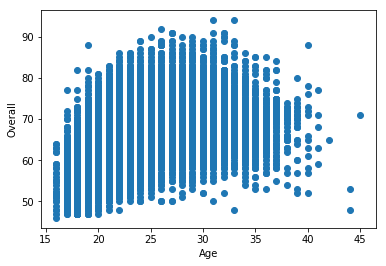

In [13]:
plt.scatter(x = df['Age'], y = df['Overall'])

plt.xlabel('Age')
plt.ylabel('Overall')

plt.show()

0.2122083543714404


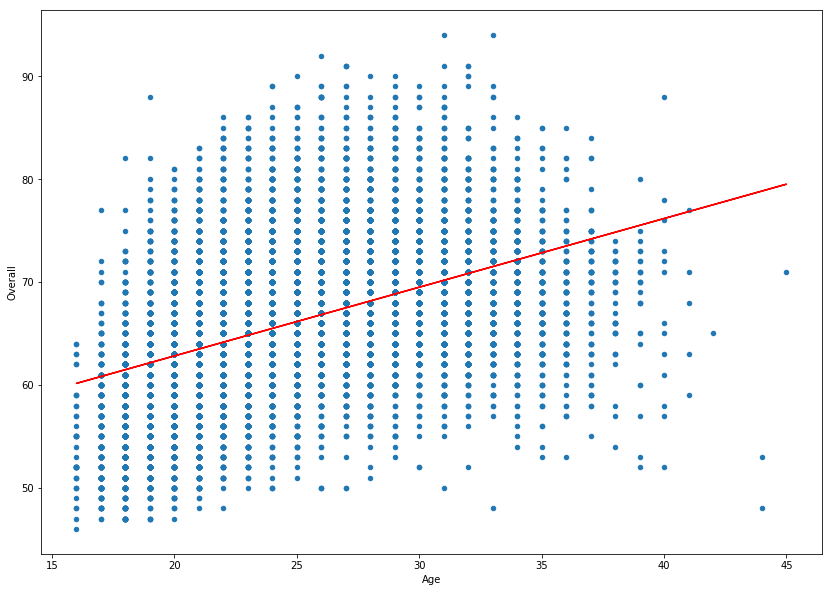

In [14]:
model = LinearRegression()

X = df[['Age']]
y = df['Overall']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

print(model.score(X_test, y_test))

df.plot.scatter(x='Age', y='Overall', figsize=[14,10])
plt.plot(X_train , model.predict(X_train), 'red')

In [15]:
model = LinearRegression()

X = df[['Age', 'Potential', 'Value']]
y = df['Overall']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

print(model.score(X_test, y_test))

0.8604087748313273


In [16]:
df[df['Preferred Foot'] == 'Left'][['Name', 'Overall']].head()

,Name,Overall
0,L. Messi,94
13,David Silva,90
15,P. Dybala,89
17,A. Griezmann,89
19,T. Courtois,89


In [17]:
df[df['Preferred Foot'] == 'Right'][['Name', 'Overall']].head()

,Name,Overall
1,Cristiano Ronaldo,94
2,Neymar Jr,92
3,De Gea,91
4,K. De Bruyne,91
5,E. Hazard,91


C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


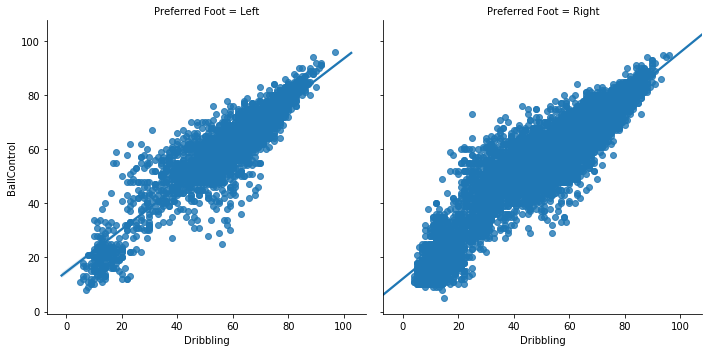

In [18]:
sns.lmplot(x = 'Dribbling', y = 'BallControl', data = df, col = 'Preferred Foot')

In [19]:
model = RandomForestRegressor()

X = df[['Value']]
y = df['Overall']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

print(model.score(X_test, y_test))

0.8836649091205941


C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
